# 프로젝트명 : 1주차 제조데이터 실습

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.

# EDA

## AutoViz 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#T-TEST : 불량품과 정상품 : 변수별로 차이가 있는지
import pandas as pd

# CSV 파일 경로
#file_path = r'C:\Users\USER\Downloads\1주_실습데이터.csv'
file_path = r'C:\Users\USER\projects\4_week_project\component4_preprocessed.csv'

# CSV 파일 불러오기
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())


     CA   V40  AL   MG  ANONYMOUS_1  BA   MO     S     P   CU  ...  PQINDEX  \
0  2971  71.6  12    8         1539   0    4  4697  1065  367  ...        8   
1  1113  73.9   0   15         1718   0    4  5495  1141  197  ...       12   
2  2977  70.4   2  193         2056   0   29  3624  1026    0  ...       10   
3  2727  81.5   9  353         3851   0  136  4000   897  108  ...       24   
4    13  66.4   0    6         2432   0    2  7057  1000  254  ...       10   

   FE    ZN  NA    K  SI  MN  ANONYMOUS_2  PB  Y_LABEL  
0  24  1186  35  9.0   4   0          200   3        0  
1  13  1262  12  3.0   3   0          200   0        0  
2  14  1074   7  2.0   5   0          544   0        0  
3  15  1007   3  6.0   5   0          200   0        0  
4  19  1020  14  3.0   1   3          200   1        0  

[5 rows x 21 columns]


In [2]:
data.head(1)

,CA,V40,AL,MG,ANONYMOUS_1,BA,MO,S,P,CU,...,PQINDEX,FE,ZN,NA,K,SI,MN,ANONYMOUS_2,PB,Y_LABEL
0,2971,71.6,12,8,1539,0,4,4697,1065,367,...,8,24,1186,35,9.0,4,0,200,3,0


## 결측치 확인

In [3]:
data.isnull().sum()

CA             0
V40            0
AL             0
MG             0
ANONYMOUS_1    0
BA             0
MO             0
S              0
P              0
CU             0
B              0
PQINDEX        0
FE             0
ZN             0
NA             0
K              0
SI             0
MN             0
ANONYMOUS_2    0
PB             0
Y_LABEL        0
dtype: int64

## 데이터 정보확인

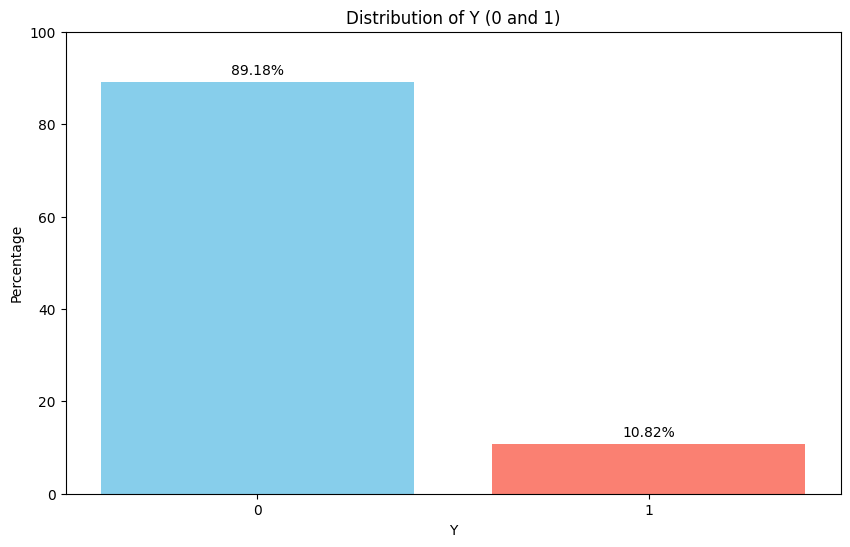

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드

# y 값의 비율 계산
y_counts = data['Y'].value_counts()

# 비율 계산
y_percentages = (y_counts / len(data)) * 100

# 세로 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(y_percentages.index.astype(str), y_percentages, color=['skyblue', 'salmon'])
plt.ylabel('Percentage')
plt.xlabel('Y')
plt.title('Distribution of Y (0 and 1)')
plt.ylim(0, 100)  # y축 범위를 0에서 100까지 설정

# 가로축에 0과 1만 보이도록 설정
plt.xticks([0, 1], ['0', '1'])

# 막대 위에 퍼센트 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 텍스트 위치 조정
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

## 고유값 확인

In [ ]:
# Check the number of unique values for each column from X1 to X20
unique_values_per_column = data.loc[:, 'X1':'X20'].nunique()
unique_values_per_column

X1     128005
X2      23468
X3       5117
X4          1
X5        229
X6      27677
X7       3553
X8      25320
X9         40
X10      2769
X11     19305
X12      7428
X13         1
X14        37
X15     11619
X16      3314
X17      2625
X18     25320
X19      7428
X20     27677
dtype: int64

<ipython-input-17-a25ec6846ff8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Column', y='Unique Values', data=unique_df, palette='viridis')


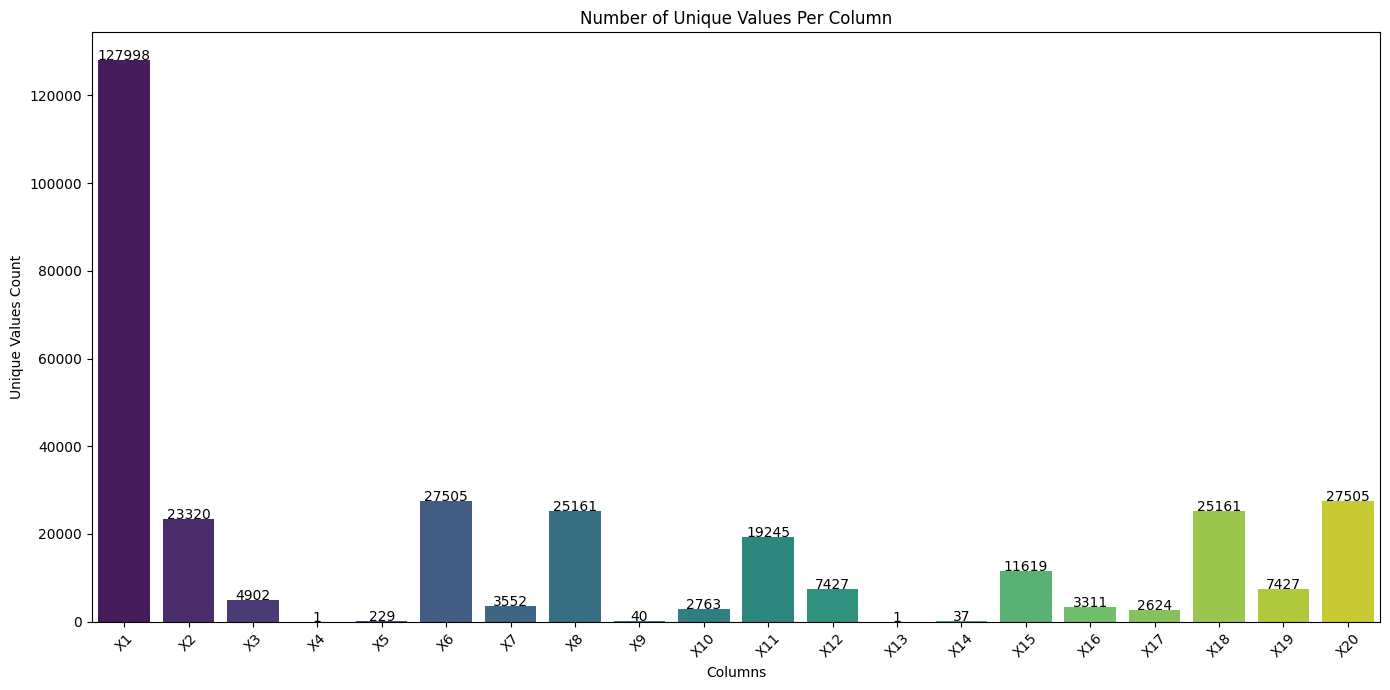

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is already loaded as per your setup
# Calculate the number of unique values per column
unique_values_per_column = data.loc[:, 'X1':'X20'].nunique()

# Convert the Series to DataFrame for easier plotting
unique_df = unique_values_per_column.reset_index()
unique_df.columns = ['Column', 'Unique Values']

# Create a bar plot
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x='Column', y='Unique Values', data=unique_df, palette='viridis')
plt.title('Number of Unique Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Values Count')
plt.xticks(rotation=45)  # Rotate column names for better visibility

# Add text labels above the bars
for index, row in unique_df.iterrows():
    bar_plot.text(row.name, row['Unique Values'], round(row['Unique Values'], 2), color='black', ha="center")

plt.tight_layout()
plt.show()


In [ ]:
data = data.drop(columns=['X4', 'X13'])
data.head(1)

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.00356,0.411261,0.693147,0.03636,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.01633,0.242926,0.557461,0.028087,0.682731,0.03636,0


## 상관관계 행렬

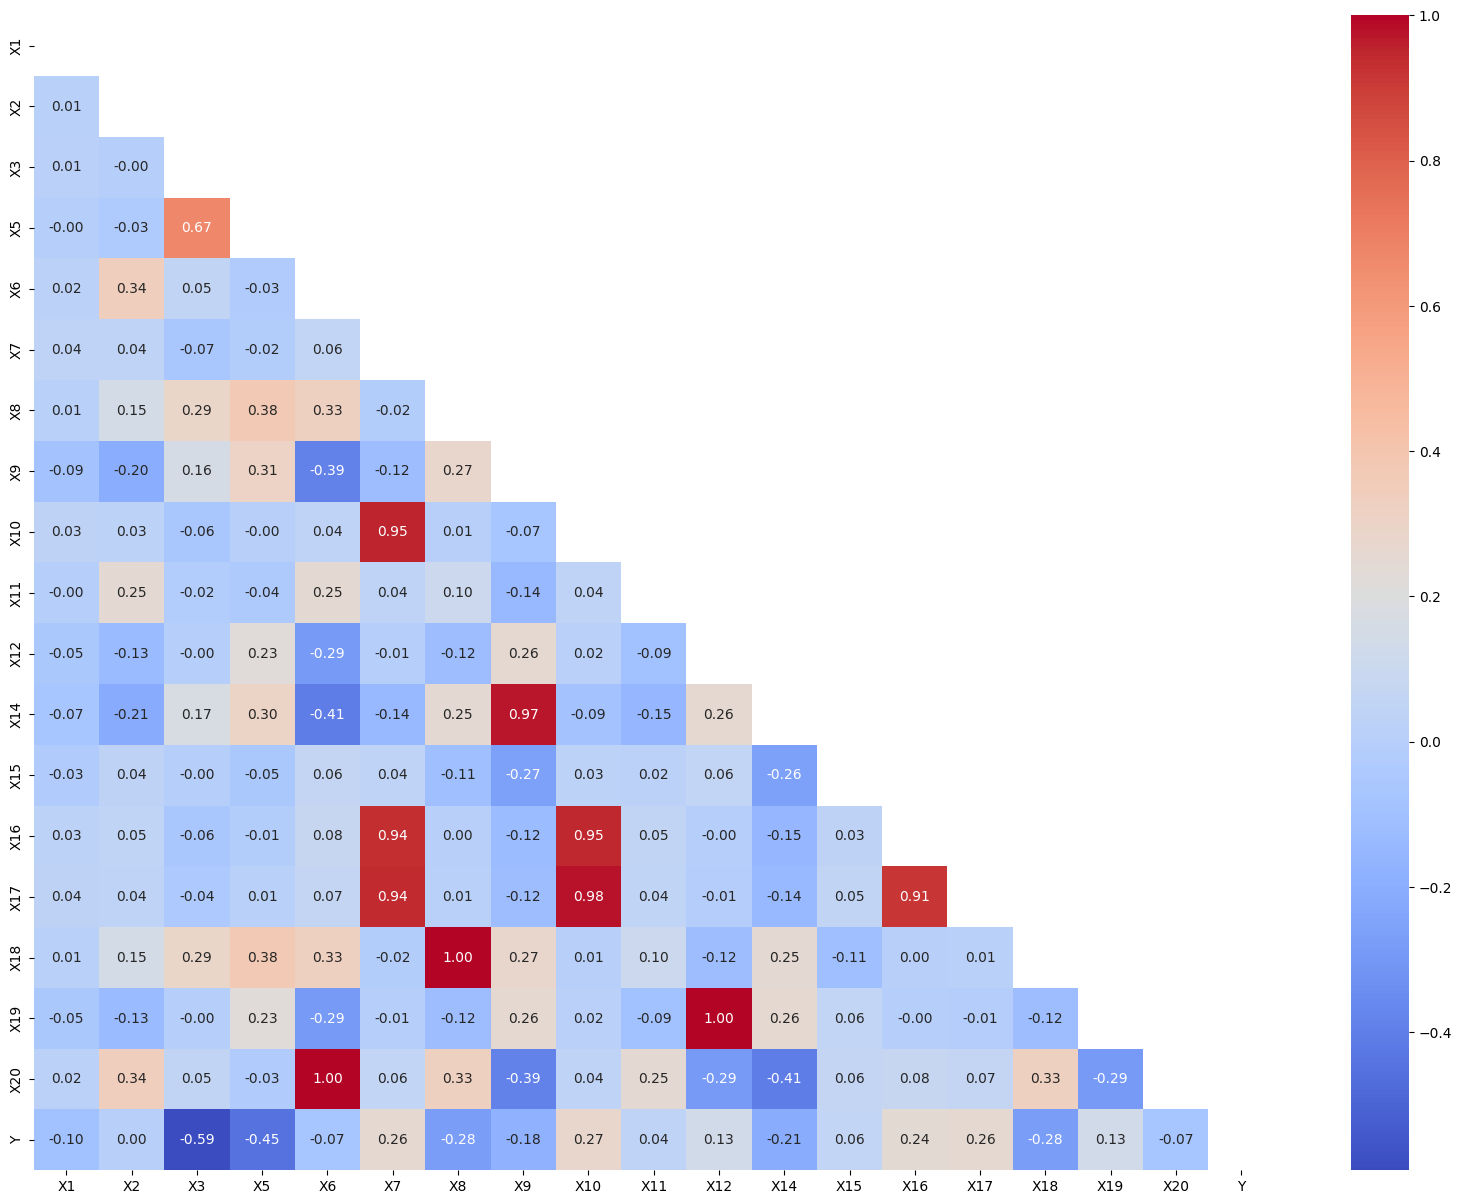

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 상관 관계 행렬
corr_matrix = data.corr()

# 대각선 기준 윗부분을 제거하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 상관 관계 행렬의 히트맵 생성, mask 적용
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
data = data.drop(columns=['X19', 'X18', 'X20'])

## 이상치확인

### 사분위수

- 사분위수를 사용했을 때, 너무 많은 데이터가 검출되어서 상하위 0.1%를 이상치로 제거하는 기법 채택

In [ ]:
columns_to_check = ['X1','X2','X3','X5','X6','X7','X8','X9','X10','X11','X12','X14','X15','X16','X17']

# 각 변수별 이상치 제거
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)  # 1사분위수
    Q3 = df[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한선
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한선

    # 이상치 제거
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거 후의 데이터프레임 출력
print(df)

              X1        X2        X3        X5        X6        X7        X8  \
1       0.006836  0.007688  0.597304  0.686838  0.067407  0.347869  0.028640   
2       0.609621  0.001461  0.466186  0.693090  0.018944  0.345032  0.024502   
3       0.074007  0.003072  0.535876  0.693147  0.031475  0.347502  0.025393   
4       0.198356  0.007020  0.416238  0.686838  0.061888  0.347441  0.028450   
5       0.643198  0.005712  0.495198  0.693147  0.053023  0.347051  0.028236   
...          ...       ...       ...       ...       ...       ...       ...   
526980  0.049564  0.003156  0.395758  0.693147  0.028951  0.342233  0.024778   
526986  0.418575  0.005609  0.414913  0.693147  0.047424  0.346677  0.026879   
526992  0.049564  0.003339  0.395505  0.693147  0.029886  0.342847  0.024778   
526993  0.525100  0.003489  0.400308  0.688810  0.030759  0.342847  0.024948   
526995  0.612937  0.001173  0.401400  0.693147  0.015237  0.346218  0.020338   

              X9       X10       X11   

### 상하위0.1%

In [ ]:
bounds = {}

for column in data.columns:
    lower_bound = data[column].quantile(0.001)
    upper_bound = data[column].quantile(0.999)
    bounds[column] = (lower_bound, upper_bound)

# 모든 컬럼에 대한 조건을 동시에 적용하여 이상치 제거
for column in data.columns:
    data = data[(data[column] >= bounds[column][0]) & (data[column] <= bounds[column][1])]

# 이상치가 제거된 데이터 확인
data.columns

Index(['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X14', 'X15', 'X16', 'X17', 'Y'],
      dtype='object')

In [ ]:
data.shape

(518368, 16)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

X = data.drop('Y_LABEL', axis=1)  # Y는 타겟 변수
y = data['Y_LABEL']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1
)

model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.4


## T-test 검정

In [6]:
import pandas as pd
import numpy as np
import scipy
## T-test 검정
t_test = []

for idx, col in enumerate(data.columns):
    t = scipy.stats.ttest_ind(data[data['Y_LABEL']==0][col],
                              data[data['Y_LABEL']==1][col])
    t_test.append([col, t[0], t[1]])

t_test_data = pd.DataFrame(t_test, columns=['col', 't', 'p-value'])

## P-value가 0.05보다 작은 변수만 추출
t_test_data = t_test_data[t_test_data['p-value']<0.05]
t_test_data

C:\Users\USER\AppData\Local\Temp\ipykernel_24180\3641279853.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t = scipy.stats.ttest_ind(data[data['Y_LABEL']==0][col],


,col,t,p-value
0,CA,4.009372,6.811544e-05
1,V40,-1.996784,4.627509e-02
2,AL,-8.712149,2.580999e-17
5,BA,-4.550189,6.422879e-06
20,Y_LABEL,-inf,0.000000e+00


# Modeling

## autoML

전체 데이터를 이용하여 autoML을 사용한 경우

In [ ]:
import pandas as pd

df = pd.read_csv('1주_실습데이터.csv')
df.head()

In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import *

setup_clf = setup(df, target = 'Y',
                  train_size = 0.7,
                #   ignore_features = ['X4', 'X13', 'X19', 'X18','X20'],
                  normalize = True,
                  normalize_method = 'zscore',
                  n_jobs = - 1,
                  session_id = 42)

In [ ]:
best = compare_models()

'X4', 'X13', 'X19', 'X18','X20'를 제외하고 autoML을 사용한 경우

In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import *

setup_clf = setup(df, target = 'Y',
                  train_size = 0.7,
                  ignore_features = ['X4', 'X13', 'X19', 'X18','X20'],
                  normalize = True,
                  normalize_method = 'zscore',
                  n_jobs = - 1,
                  session_id = 42)

In [ ]:
# 상위 3개 모델 비교
top_3_models = compare_models(n_select=3)

# 상위 3개 모델 출력
print(top_3_models)

# 세 번째 모델 선택
third_model = top_3_models[2]

# 세 번째 모델 출력
print(third_model)

In [ ]:
third_model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

X = data.drop('Y', axis=1)  # Y는 타겟 변수
y = data['Y']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1
)

model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

In [ ]:
data.shape

(527000, 16)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

X = data.drop('Y', axis=1)  # Y는 타겟 변수
y = data['Y']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1
)

model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:49:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score: 0.9985147649834003


## 변수 중요도 추출

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 변수 중요도 추출
feature_importances = model.feature_importances_

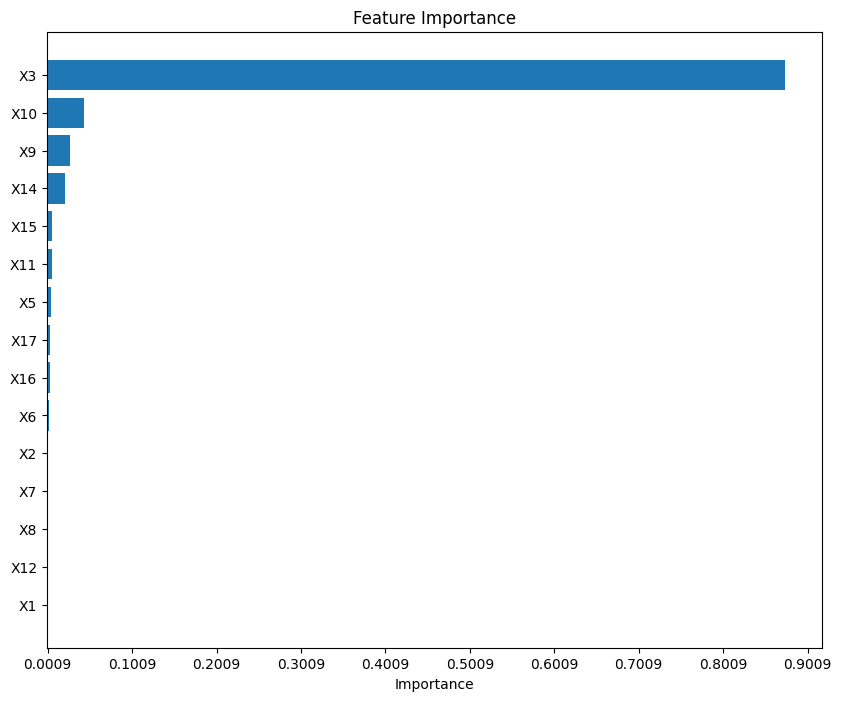

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
features = X_train.columns

# 가정: feature_importances는 이미 계산된 피처 중요도 배열
# features = X_train.columns # X_train이 pandas DataFrame일 경우
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 막대 그래프로 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # y축 순서 뒤집기

# x축 눈금 간격 설정
plt.xticks(np.arange(min(importance_df['Importance']), max(importance_df['Importance']) + 0.1, 0.1))

plt.show()


## PDP 생성

In [ ]:
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = cut_result.codes
/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = df.apply(


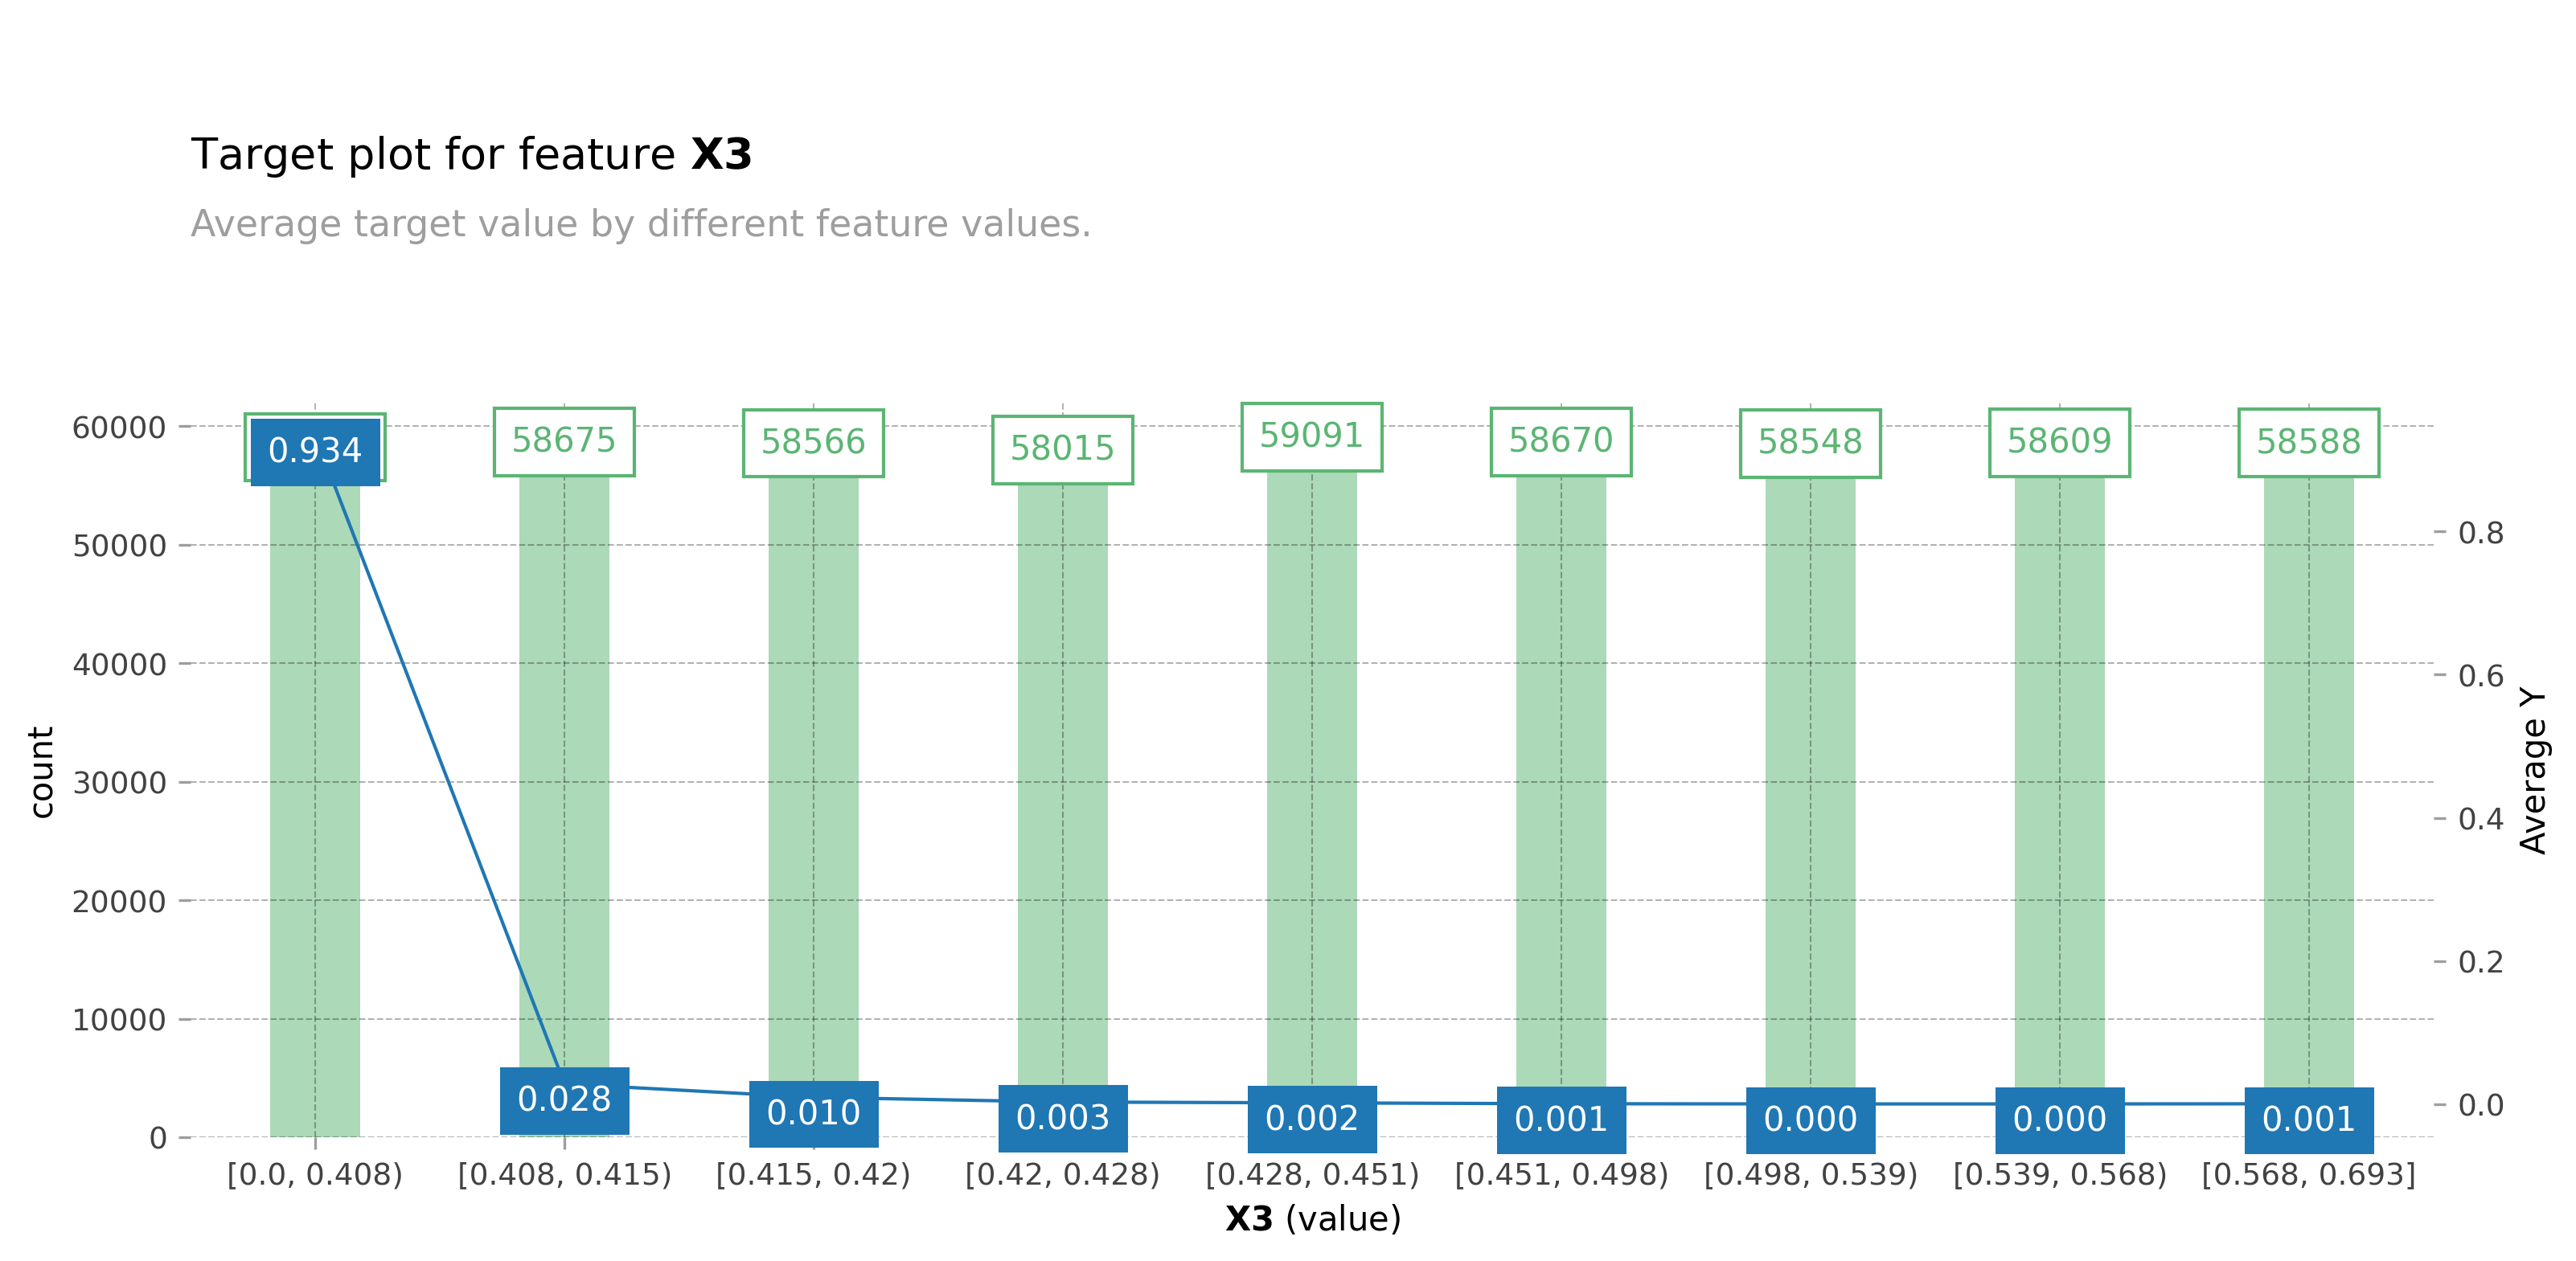

In [ ]:
from pdpbox import info_plots

pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=df,
    feature='X3',
    feature_name='X3',
    target='Y',
)

fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = cut_result.codes
/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = df.apply(


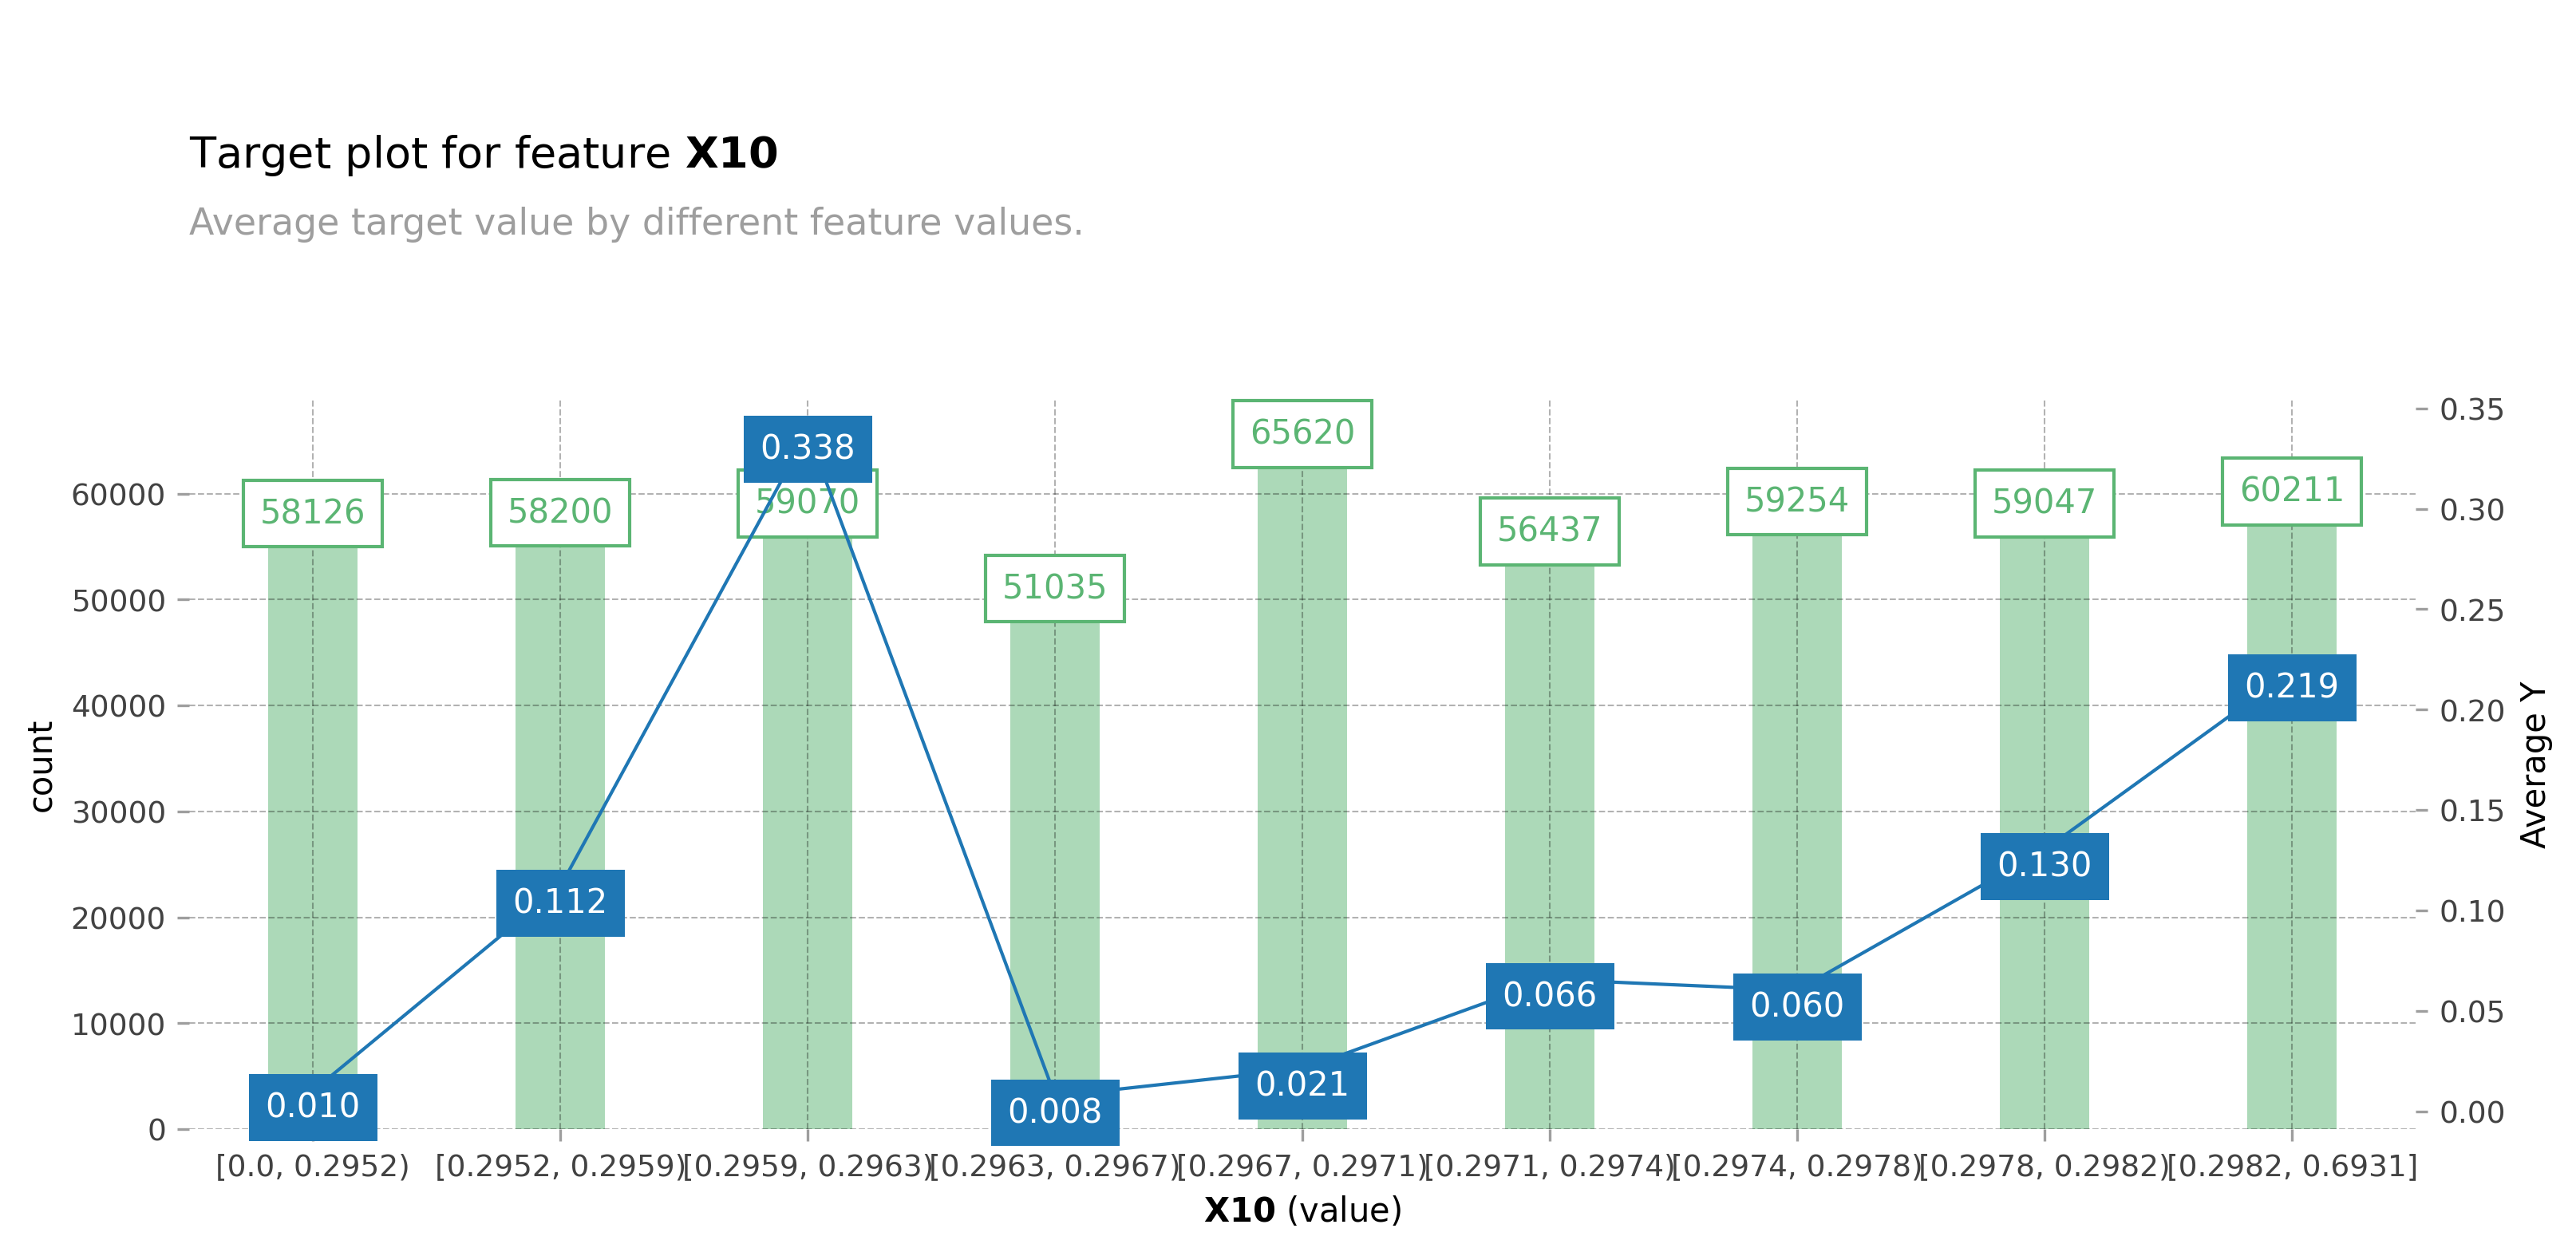

In [ ]:
target_plot2 = info_plots.TargetPlot(
    df=df,
    feature='X10',
    feature_name='X10',
    target='Y',
)

fig2, axes2, summary_df2 = target_plot2.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

## shap 생성

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.9 MB/s eta 0:00:00


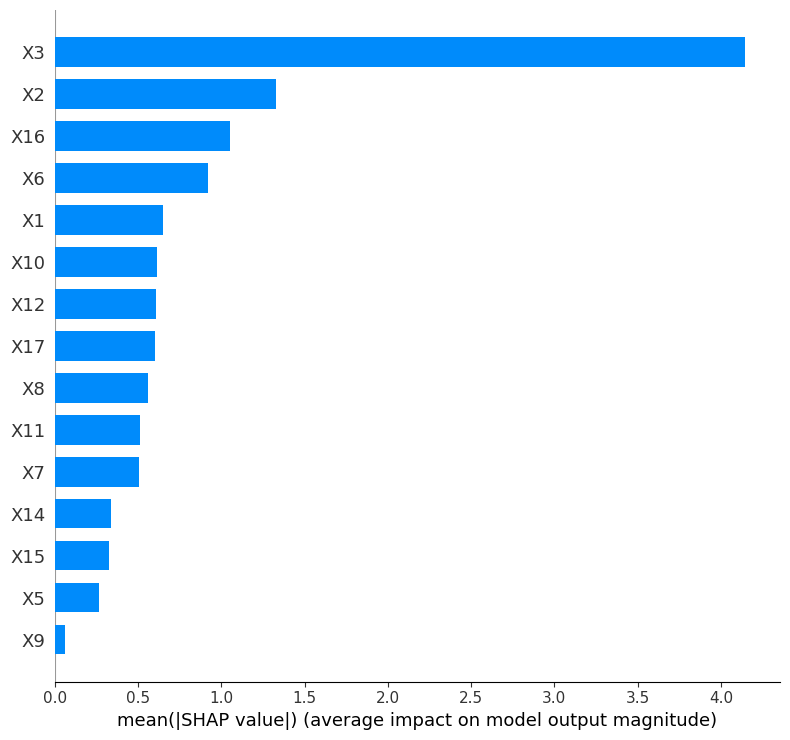

In [ ]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# XGBoost 모델 훈련
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# SHAP 값 생성
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train, plot_type="bar")


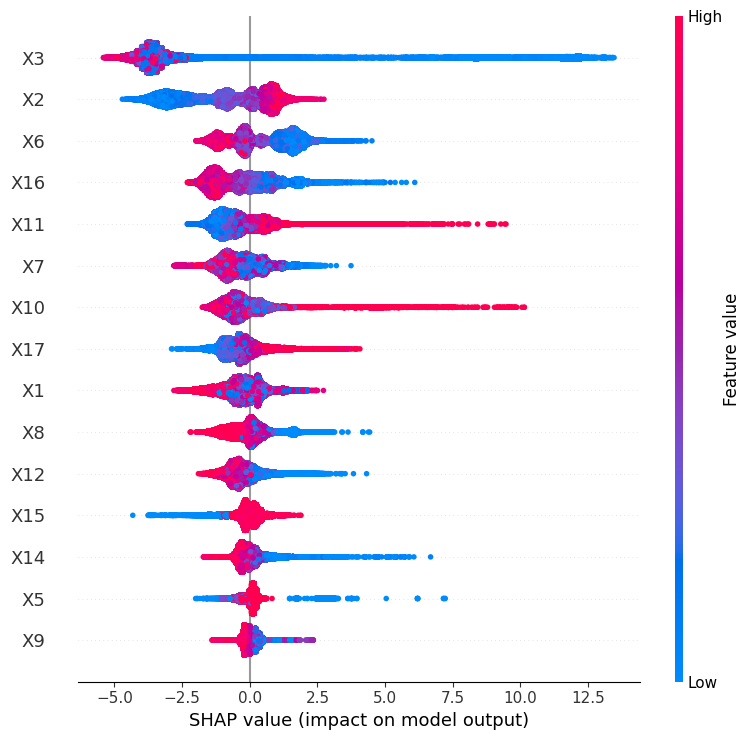

In [ ]:
shap.summary_plot(shap_values, X_train) #x3수치가 작을수록 / x11과 x10에 수치가 높을수록 영향을준다.

## plot_tree 코드

In [7]:
from xgboost import plot_tree
import matplotlib.pyplot as plt ## 차트를 그리기 위한 라이브러리
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리

## 오류 무시
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(model)
plt.show() ## 차트를 보여준다.

In [10]:
# np.histogram을 사용하여 X3 데이터를 5개 구간으로 나누고 경계값도 얻기
count, bin_dividers = np.histogram(data['AL'], bins=5)

# pd.cut을 사용하여 각 데이터 포인트를 구간에 할당
data['X3_bin'] = pd.cut(data['AL'], bins=bin_dividers, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5'], include_lowest=True)

# 불량 여부를 나타내는 'Defect' 열 생성 (1은 불량, 0은 정상)
data['Defect'] = data['Y_LABEL'] == 1  # 'Y' 열이 불량 여부를 나타내는 경우

# 각 구간에서의 불량률 계산
defect_rate = data.groupby('X3_bin')['Defect'].mean()

# 결과 출력
print("X3 구간 경계값:")
for i in range(len(bin_dividers)-1):
    print(f"  Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}")

print("\n각 구간의 불량률:")
for bin_label, rate in defect_rate.items():
    print(f"  {bin_label}: {rate:.2%}")

X3 구간 경계값:
  Bin1: 19.54 ~ 31.15
  Bin2: 31.15 ~ 42.76
  Bin3: 42.76 ~ 54.37
  Bin4: 54.37 ~ 65.98
  Bin5: 65.98 ~ 77.59

각 구간의 불량률:
  Bin1: 24.14%
  Bin2: 27.31%
  Bin3: 35.09%
  Bin4: 31.30%
  Bin5: 43.40%


### X3 세분화

<ipython-input-18-6dd1b316e912>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='X3_Bin', y='Defect_Rate', data=defect_rate, palette='viridis')


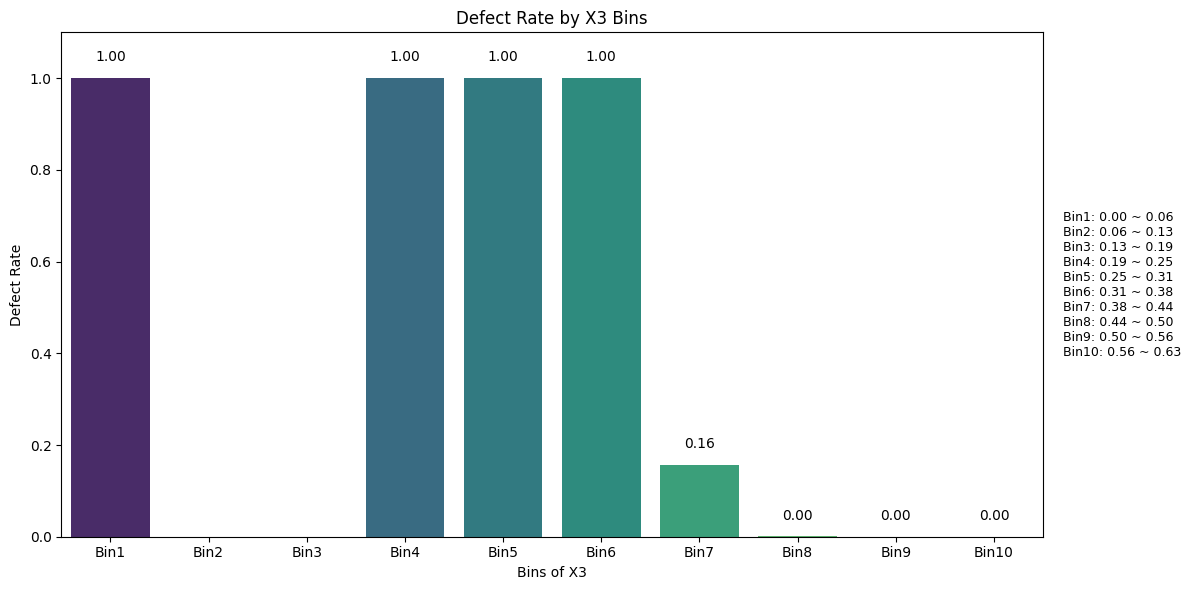

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Remove outliers for X3
lower_bound = data['X3'].quantile(0.001)
upper_bound = data['X3'].quantile(0.999)
data = data[(data['X3'] >= lower_bound) & (data['X3'] <= upper_bound)]

# Divide X3 into 10 bins and retrieve bin edges
count, bin_dividers = np.histogram(data['X3'], bins=10)

# Assign data points to bins
bin_labels = [f'Bin{i+1}' for i in range(10)]
data['X3_bin'] = pd.cut(data['X3'], bins=bin_dividers, labels=bin_labels, include_lowest=True)

# Create 'Defect' column (1 for defects, 0 for non-defects)
data['Defect'] = data['Y'] == 1

# Calculate defect rate per bin
defect_rate = data.groupby('X3_bin')['Defect'].mean().reset_index()
defect_rate.columns = ['X3_Bin', 'Defect_Rate']

# Visualization
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='X3_Bin', y='Defect_Rate', data=defect_rate, palette='viridis')
plt.title('Defect Rate by X3 Bins')
plt.xlabel('Bins of X3')
plt.ylabel('Defect Rate')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

# Dynamically place defect rate text above each bar
for index, row in defect_rate.iterrows():
    y_offset = 0.03  # Adjust text offset based on your data scale
    bar_plot.text(index, row['Defect_Rate'] + y_offset, f'{row["Defect_Rate"]:.2f}', color='black', ha="center", va='bottom')

# Adding legend for bin ranges
legend_text = '\n'.join([f'Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}' for i in range(len(bin_dividers)-1)])
plt.gca().text(1.02, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='center')

plt.tight_layout()
plt.show()


### X3의 구간 Bin7 추가 세분화

---



<ipython-input-19-05108c5dbf86>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin7_data['X3_bin7_sub'] = pd.cut(bin7_data['X3'], bins=bin7_dividers, labels=bin7_labels, include_lowest=True)
<ipython-input-19-05108c5dbf86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin7_data['Defect'] = bin7_data['Y'] == 1
<ipython-input-19-05108c5dbf86>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

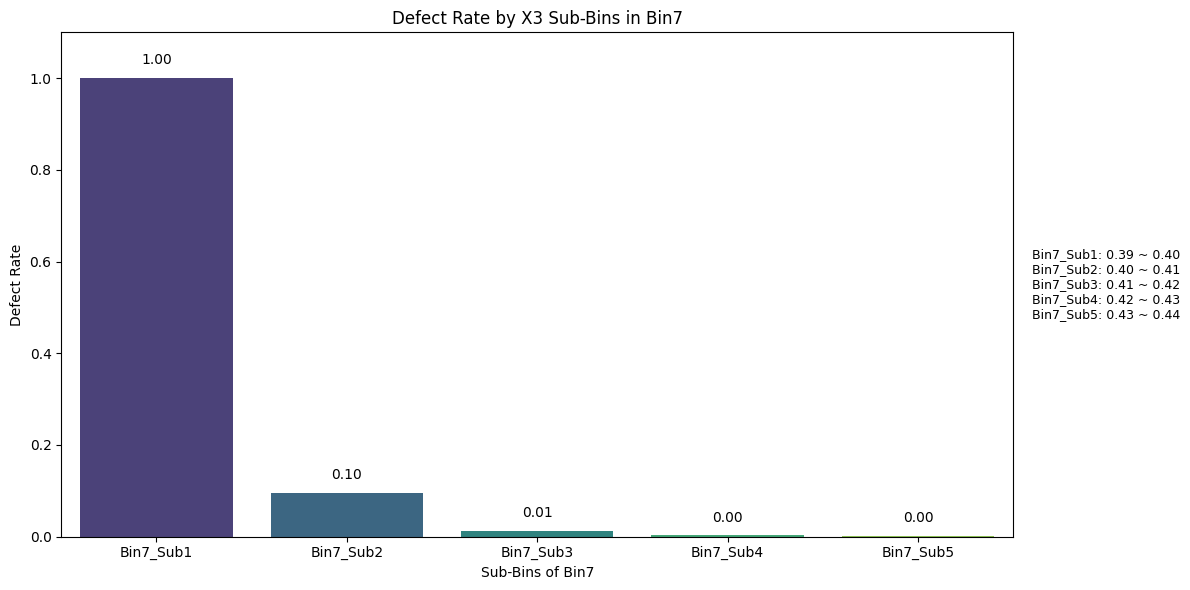

Detailed X3 Sub-Bin7 Boundaries and Defect Rates:
Bin7_Sub1: 0.39 to 0.40 - Defect Rate: 100.00%
Bin7_Sub2: 0.40 to 0.41 - Defect Rate: 9.51%
Bin7_Sub3: 0.41 to 0.42 - Defect Rate: 1.23%
Bin7_Sub4: 0.42 to 0.43 - Defect Rate: 0.26%
Bin7_Sub5: 0.43 to 0.44 - Defect Rate: 0.19%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
file_path = '/content/drive/MyDrive/lsda02/pre/1주_실습데이터.csv'
data = pd.read_csv(file_path)

# Remove outliers for X3
lower_bound = data['X3'].quantile(0.001)
upper_bound = data['X3'].quantile(0.999)
data = data[(data['X3'] >= lower_bound) & (data['X3'] <= upper_bound)]

# Narrowing down to Bin7 range for more detailed analysis
bin7_lower_bound = 0.38
bin7_upper_bound = 0.44
bin7_data = data[(data['X3'] >= bin7_lower_bound) & (data['X3'] <= bin7_upper_bound)]

# np.histogram to divide Bin7 into smaller sub-bins
count, bin7_dividers = np.histogram(bin7_data['X3'], bins=5)

# Assign data points to sub-bins
bin7_labels = [f'Bin7_Sub{i+1}' for i in range(5)]
bin7_data['X3_bin7_sub'] = pd.cut(bin7_data['X3'], bins=bin7_dividers, labels=bin7_labels, include_lowest=True)

# Create 'Defect' column (1 for defects, 0 for non-defects)
bin7_data['Defect'] = bin7_data['Y'] == 1

# Calculate defect rate per sub-bin
defect_rate_bin7 = bin7_data.groupby('X3_bin7_sub')['Defect'].mean().reset_index()
defect_rate_bin7.columns = ['X3_Bin7_Sub', 'Defect_Rate']

# Visualization
plt.figure(figsize=(12, 6))
bar_plot_bin7 = sns.barplot(x='X3_Bin7_Sub', y='Defect_Rate', data=defect_rate_bin7, palette='viridis')
plt.title('Defect Rate by X3 Sub-Bins in Bin7')
plt.xlabel('Sub-Bins of Bin7')
plt.ylabel('Defect Rate')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

# Add defect rate text above each bar for clarity
for index, row in defect_rate_bin7.iterrows():
    bar_plot_bin7.text(index, row.Defect_Rate + 0.03, f'{row.Defect_Rate:.2f}', color='black', ha="center")

# Adding legend for bin ranges on the right side
legend_text = '\n'.join([f'{label}: {bin7_dividers[i]:.2f} ~ {bin7_dividers[i+1]:.2f}' for i, label in enumerate(bin7_labels)])
plt.gca().text(1.02, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='center')

plt.tight_layout()
plt.show()

# Print detailed bin boundaries and defect rates
print("Detailed X3 Sub-Bin7 Boundaries and Defect Rates:")
for index, (label, rate) in enumerate(zip(bin7_labels, defect_rate_bin7['Defect_Rate'])):
    print(f"{label}: {bin7_dividers[index]:.2f} to {bin7_dividers[index + 1]:.2f} - Defect Rate: {rate:.2%}")


### X10 세분화

<ipython-input-23-8e68f63344cb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='X10_Bin', y='Defect_Rate', data=defect_rate, palette='viridis')


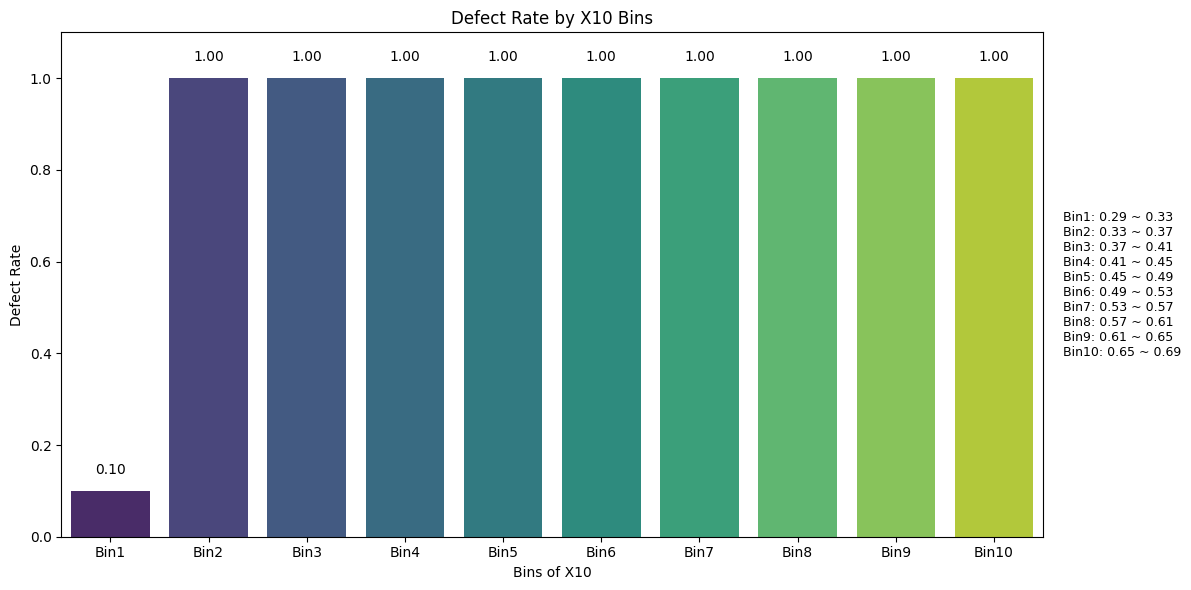

X10 구간 경계값:
Bin1: 0.29 ~ 0.33
Bin2: 0.33 ~ 0.37
Bin3: 0.37 ~ 0.41
Bin4: 0.41 ~ 0.45
Bin5: 0.45 ~ 0.49
Bin6: 0.49 ~ 0.53
Bin7: 0.53 ~ 0.57
Bin8: 0.57 ~ 0.61
Bin9: 0.61 ~ 0.65
Bin10: 0.65 ~ 0.69

각 구간의 불량률:
Bin1: 9.92%
Bin2: 100.00%
Bin3: 100.00%
Bin4: 100.00%
Bin5: 100.00%
Bin6: 100.00%
Bin7: 100.00%
Bin8: 100.00%
Bin9: 100.00%
Bin10: 100.00%


In [ ]:

# np.histogram을 사용하여 X10 데이터를 10개의 구간으로 나누기
count, bin_dividers = np.histogram(filtered_data['X10'], bins=10)

# pd.cut을 사용하여 각 데이터 포인트를 구간에 할당
bin_labels = [f'Bin{i+1}' for i in range(10)]
filtered_data['X10_bin'] = pd.cut(filtered_data['X10'], bins=bin_dividers, labels=bin_labels, include_lowest=True)

# 불량 여부를 나타내는 'Defect' 열 생성 (1은 불량, 0은 정상)
filtered_data['Defect'] = (filtered_data['Y'] == 1).astype(int)

# 각 구간에서의 불량률 계산
defect_rate = filtered_data.groupby('X10_bin')['Defect'].mean().reset_index()
defect_rate.columns = ['X10_Bin', 'Defect_Rate']

# 시각화
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='X10_Bin', y='Defect_Rate', data=defect_rate, palette='viridis')
plt.title('Defect Rate by X10 Bins')
plt.xlabel('Bins of X10')
plt.ylabel('Defect Rate')
plt.ylim(0, 1.1)  # Extend y-axis to fit text

# Add text annotation for defect rates above bars
for index, row in defect_rate.iterrows():
    plt.text(index, row['Defect_Rate'] + 0.03, f'{row["Defect_Rate"]:.2f}', color='black', ha="center", va='bottom')

# Adding legend for bin ranges on the right side
legend_text = '\n'.join([f'{label}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}' for i, label in enumerate(bin_labels)])
plt.gca().text(1.02, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='center')

plt.tight_layout()
plt.show()

# 결과 출력
print("X10 구간 경계값:")
for i in range(len(bin_dividers)-1):
    print(f"Bin{i+1}: {bin_dividers[i]:.2f} ~ {bin_dividers[i+1]:.2f}")

print("\n각 구간의 불량률:")
for index, row in defect_rate.iterrows():
    print(f"{row['X10_Bin']}: {row['Defect_Rate']:.2%}")


# 결론
- X3이 불량요인에 가장 큰 영향을 주며, 두번째로 큰 영향을 미치는 변수는 X10이다.
- X3의 값이 0.408이하일 경우, 불량품이 발생하므로, X3의 값이 0.408보다 크도록 설계해야한다.
- X10의 값이 0.290이상일 경우, 불량품이 발생하므로, X10의 값이 0.290보다 작도록 조절해야한다.